<a href="https://colab.research.google.com/github/rajy4683/S6EVA4/blob/master/S6_L2_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Final Accuracy: 99.44**
###  Number of parameters - 7288
### Number of epochs with 99.4 acc = 6

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/EVA4/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from MNISTRekog.basemodelclass import MNISTDigitBuilder

In [0]:
from MNISTRekog.utils.fileutils import *

In [4]:
print(rand_run_name())
print(generate_model_save_path())

84d0d4fc53
/content/drive/My Drive/EVA4/model_saves/model-191dd55193.h5


In [5]:
!pip install pytorch-ignite
!pip install torchsummary
!pip install wandb

     |████████████████████████████████| 122kB 12.6MB/s 
     |████████████████████████████████| 1.4MB 40.9MB/s 
     |████████████████████████████████| 102kB 15.3MB/s 
     |████████████████████████████████| 460kB 52.3MB/s 
     |████████████████████████████████| 102kB 14.7MB/s 
     |████████████████████████████████| 102kB 15.9MB/s 
     |████████████████████████████████| 71kB 11.7MB/s 
     |████████████████████████████████| 71kB 11.8MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.2-cp36-none-any.whl size=73605 sha256=e84c913b3138c1a185779b6e849872c43ee996e8ddbd4e8981a17f3cf36aa590
  Stored in directory: /root/.cache/pip/wheels/bc/ed/6c/028dea90d31b359cd2a7c8b0da4db80e41d24a59614154072e
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=8b19ab9abc283da30fb8c6210829aa5c471778012c7dd699e056f236f8c2919a
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f0addafb3cbb6bd2da23
  Created wheel for shortuuid: filename=

In [6]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary
from torchsummary import summary
import pandas as pd
import numpy as np

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss
from torch.utils.data import DataLoader
from ignite.handlers import Checkpoint, DiskSaver


import logging
logging.propagate = False 
logging.getLogger().setLevel(logging.ERROR)

from argparse import ArgumentParser
from tqdm import tqdm
import os
import random


In [0]:
import logging
logging.propagate = False 

logging.getLogger().setLevel(logging.ERROR)

In [9]:
import wandb
#wandb.init()
#!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204
#wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [11]:
# WandB – Config is a variable that holds and saves hyperparameters and inputs
# hyperparameter_defaults = dict(
#     dropout = 0.1,
#     channels_one = 16,
#     channels_two = 32,
#     batch_size = 64,
#     test_batch_size=64,
#     lr = 0.018,
#     momentum = 0.9,
#     no_cuda = False,
#     seed = 1,
#     epochs = 20,
#     bias = False,
#     log_interval = 10
#     )

hyperparameter_defaults = dict(
    dropout = 0.1,#0.07114420042272313,
    channels_one = 16,
    channels_two = 32,
    batch_size = 64,
    test_batch_size=34,
    lr = 0.04, #0.030455453938066226, #0.018,# 0.017530428914306426,
    momentum = 0.95, #0.8424379743502641,
    no_cuda = False,
    seed = 1,
    epochs = 15,
    bias = False,
    log_interval = 11,
    sched_lr_gamma = 0.5,
    sched_lr_step= 1,
    start_lr = 5
    )



wandb.init(config=hyperparameter_defaults, project="news4eva4")
wandb.watch_called = False # Re-run the model without restarting the runtime, unnecessary after our next release
config = wandb.config


In [12]:
#from basemodelclass import Net
model = MNISTDigitBuilder(dropout=0.1).to(device)
summary(model, input_size=(1, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
       BatchNorm2d-2            [-1, 8, 28, 28]              16
              ReLU-3            [-1, 8, 28, 28]               0
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5            [-1, 8, 28, 28]             576
       BatchNorm2d-6            [-1, 8, 28, 28]              16
              ReLU-7            [-1, 8, 28, 28]               0
         MaxPool2d-8            [-1, 8, 14, 14]               0
           Dropout-9            [-1, 8, 14, 14]               0
           Conv2d-10            [-1, 8, 14, 14]             576
      BatchNorm2d-11            [-1, 8, 14, 14]              16
             ReLU-12            [-1, 8, 14, 14]               0
          Dropout-13            [-1, 8, 14, 14]               0
           Conv2d-14           [-1, 16,

In [0]:
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [0]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
train_losses = []
test_losses = []
train_acc = []
test_acc = []

from tqdm import tqdm
def train(args, model, device, train_loader, optimizer, epoch_number):
    model.train()
    pbar = tqdm(train_loader)
    train_loss = 0
    train_accuracy = 0
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        train_accuracy += pred.eq(target.view_as(pred)).sum().item()

        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')
        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)
    #print('\nEpoch: {:.0f} Train set: Average loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
    #    epoch_number, train_loss, train_accuracy, len(train_loader.dataset),
    #    100. * train_accuracy / len(train_loader.dataset)))
    train_accuracy = (100. * train_accuracy) / len(train_loader.dataset)
    #train_acc.append(train_accuracy)
    #train_losses.append(train_loss)

    return train_accuracy, train_loss

def test(args, model, device, test_loader,classes,epoch_number):
    model.eval()
    test_loss = 0
    correct = 0
    example_images = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
        #example_images.append(wandb.Image(
        #        data[0], caption="Pred: {} Truth: {}".format(classes[pred[0].item()], classes[target[0]])))

    test_loss /= len(test_loader.dataset)
    test_accuracy = (100. * correct) / len(test_loader.dataset)

    #print('\nEpoch: {:.0f} Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
    #    epoch_number, test_loss, correct, len(test_loader.dataset),
    #    100. * correct / len(test_loader.dataset)))
    #test_acc.append(test_accuracy)
    #test_losses.append(test_loss)

    return test_accuracy, test_loss

In [16]:
kwargs_2 = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
train_loader_2 = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=train_transforms),
    batch_size=config.batch_size, shuffle=True, **kwargs_2)
test_loader_2 = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=test_transforms),
        batch_size=config.batch_size, shuffle=True, **kwargs_2)

len(train_loader_2),len(test_loader_2)


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


(938, 157)

In [0]:
api = wandb.Api()
my_runs = api.run("rajy4683/news4eva4/runs/ige4ebxr")
for file in my_runs.files():
    file.download(replace=True)
my_runs = api.runs("rajy4683/news4eva4",order='-created_at')


In [0]:
model = MNISTDigitBuilder(dropout=config.dropout).to(device)
model.load_state_dict(torch.load("/content/drive/My Drive/EVA4/model-28f815bd29_9948.h5", map_location=device))

<All keys matched successfully>

In [0]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
epoch_test_acc,epoch_test_loss = test(config, model, device, test_loader_2, classes,1)
print(epoch_test_acc,epoch_test_loss)


Epoch: 1 Test set: Average loss: 0.0169, Accuracy: 9945/10000 (99.450%)

99.45 0.0168770587682724


In [0]:
my_run_name = rand_run_name()
print(my_run_name)
print(generate_model_save_path(rand_string=my_run_name))

38b108dad4
/content/drive/My Drive/EVA4/model-38b108dad4.h5


In [0]:
device

device(type='cuda')

In [0]:
"""
    Creates the model object on the specified device
"""
def model_builder(model_class=None, weights_path=None, local_device=torch.device("cpu")):
    if (model_class == None):
        print("Please provide the model object to be used")
        return
    local_model = model_class()#.to(local_device)
    try:
        if (weights_path != None):
            checkpoint = torch.load(weights_path)
            local_model.load_state_dict(checkpoint['model_state_dict'])
                #torch.load(weights_path, map_location=local_device))           
    except:
        print("Some execption occured during loading the model")
    return local_model.to(local_device)       


    


In [0]:
### epoch,train_loss, train_accuracy, test_loss, test_accuracy, lr, momentum, weight_decay
global_stats_array = np.array([[0,0,0,0,0,0,0,0]])
global_stats_array.shape

(1, 8)

In [0]:
global_stats_array

array([[0, 0, 0, 0, 0, 0, 0, 0]])

In [0]:
"""
    Called per-epoch to log most of the test data
"""
#global_stats_array = np.array([[]])
def stats_logger(stats_array, epoch,
                 train_loss, train_accuracy, 
                 test_loss, test_accuracy, 
                 lr, momentum=0.95, 
                 weight_decay=0):
    return np.append(stats_array, [[epoch,train_loss, train_accuracy, test_loss, test_accuracy, lr, momentum, weight_decay]],axis=0)
    
    #print(global_stats_array)


In [0]:
global_stats_array = stats_logger(global_stats_array, 1,0.1,99.0,0.1,98.0,0.001,0.78,0.00001)

NameError: ignored

In [0]:
global_stats_array[1:].round(3)

array([[1.0e+00, 1.0e-01, 9.9e+01, 1.0e-01, 9.8e+01, 1.0e-03, 7.8e-01,
        0.0e+00],
       [1.0e+00, 1.0e-01, 9.9e+01, 1.0e-01, 9.8e+01, 1.0e-03, 7.8e-01,
        0.0e+00]])

In [0]:
global_stats_array[1]

array([1.0e+00, 1.0e-01, 9.9e+01, 1.0e-01, 9.8e+01, 1.0e-03, 7.8e-01,
       1.0e-05])

In [0]:
my_model = model_builder(MNISTDigitBuilder, 
                      weights_path="/content/drive/My Drive/EVA4/baseline_models/model-1b795c6652.h5",
                      local_device=device)

In [0]:
type(my_model)
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
epoch_test_acc,epoch_test_loss = test(config, my_model, device, test_loader_2, classes,1)
print(epoch_test_acc,epoch_test_loss)

99.4 0.022845898485183716


In [0]:
from MNISTRekog.utils.fileutils import *

In [0]:
optimizer2 = optim.SGD(model.parameters(), lr=config.lr,
                          momentum=config.momentum)
scheduler = StepLR(optimizer2, step_size=1, gamma=1)

In [0]:
scheduler.__step_count

AttributeError: ignored

In [0]:
myoptim = optimizer2.state_dict()['param_groups'][0]

In [0]:
myoptim['lr'],myoptim['momentum'],myoptim['weight_decay'],

(0.04, 0.95, 0)

In [0]:
!cp /content/drive/My\ Drive/EVA4/model-1b795c6652.h5 /content/drive/My\ Drive/EVA4/baseline_models

In [23]:
#model = MNISTDigitBuilder(start_channels=16,exponetate_layers=False).to(device)
#wandb.init(project="news4eva4")
from torch.optim.lr_scheduler import StepLR, OneCycleLR, MultiStepLR
import os
hyperparameter_defaults = dict(
    run_name = rand_run_name(),
    dropout = 0.1,#0.07114420042272313,
    batch_size = 82,
    test_batch_size=34,
    lr = 0.00625, #0.042259475404268484, #0.032877745711371975, #0.007, #0.030455453938066226, #0.018,# 0.017530428914306426,
    momentum = 0.9, #0.6635974310124919, #0.824176605049245, #0.95, #0.8424379743502641,
    no_cuda = False,
    seed = 1,
    epochs = 40,
    bias = False,
    sched_lr_gamma = 0.5, #0.7836943786449023, #0.271611419527123, #0.99,
    sched_lr_step= 10,
    start_lr = 7,
    weight_decay=5.740256897290758e-05, #1.8540436495464775e-06
    )

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
# train_losses = []
# test_losses = []
# train_acc = []
# test_acc = []

wandb.init(config=hyperparameter_defaults, project="news4eva4")
wandb.watch_called = False # Re-run the model without restarting the runtime, unnecessary after our next release
config = wandb.config
model_path = generate_model_save_path(rand_string=config.run_name)
print("Model will be saved to:", model_path)
prev_saved_model = "/content/drive/My Drive/EVA4/baseline_models/model-1b795c6652.h5"

def main():
    use_cuda = not config.no_cuda and torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
    
    # Set random seeds and deterministic pytorch for reproducibility
    # random.seed(config.seed)       # python random seed
    torch.manual_seed(config.seed) # pytorch random seed
    # numpy.random.seed(config.seed) # numpy random seed
    torch.backends.cudnn.deterministic = True

    # Load the dataset: We're training our CNN on CIFAR10 (https://www.cs.toronto.edu/~kriz/cifar.html)
    # First we define the tranformations to apply to our images
    #kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                        transform=train_transforms),
        batch_size=config.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=test_transforms),
        batch_size=config.batch_size, shuffle=True, **kwargs)

    # Initialize our model, recursively go over all modules and convert their parameters and buffers to CUDA tensors (if device is set to cuda)
    model = model_builder(MNISTDigitBuilder, 
                      weights_path=prev_saved_model,
                      local_device=device)
    
    #model = MNISTDigitBuilder(dropout=config.dropout).to(device)
    #model.load_state_dict(torch.load(prev_saved_model, map_location=device))

    optimizer = optim.SGD(model.parameters(), lr=config.lr,
                          momentum=config.momentum, weight_decay=config.weight_decay)
    
    scheduler = StepLR(optimizer, step_size=config.sched_lr_step, gamma=config.sched_lr_gamma)
    #scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=config.lr, steps_per_epoch=len(train_loader), epochs=config.epochs)
    #scheduler = MultiStepLR(optimizer, milestones=[10,20], gamma=config.sched_lr_gamma)
    # WandB – wandb.watch() automatically fetches all layer dimensions, gradients, model parameters and logs them automatically to your dashboard.
    # Using log="all" log histograms of parameter values in addition to gradients
    wandb.watch(model, log="all")

    for epoch in range(1, config.epochs + 1):
        epoch_train_acc,epoch_train_loss = train(config, model, device, train_loader, optimizer, epoch)        
        epoch_test_acc,epoch_test_loss = test(config, model, device, test_loader, classes,epoch)

        #epoch_stats
        
        print('\nEpoch: {:.0f} Train set: Average loss: {:.4f}, Accuracy: {:.3f}%'.format(
        epoch, epoch_train_loss, epoch_train_acc))
        print('Epoch: {:.0f} Test set: Average loss: {:.4f}, Accuracy: {:.3f}%'.format(
        epoch, epoch_test_loss, epoch_test_acc))
        myoptim = optimizer.state_dict()['param_groups'][0]
        #print('Epoch: {:.0f} Optimizer values: LR: {:.10f}, LastLR:{:.10f}, Momentum: {:.10f}, Weight Decay: {:.10f}'.format(
        #epoch, scheduler.get_lr()[0],scheduler.get_last_lr()[0],myoptim['momentum'],myoptim['weight_decay']))

        print('Epoch: {:.0f} Optimizer values: LastLR:{:.10f}, Momentum: {:.10f}, Weight Decay: {:.10f}'.format(
        epoch, scheduler.get_last_lr()[0],myoptim['momentum'],myoptim['weight_decay']))

        #stats_logger(global_stats_array, 1,0.1,99.0,0.1,98.0,0.001,0.78,0.00001)
        
        wandb.log({ "Train Accuracy": epoch_train_acc, 
                   "Train Loss": epoch_train_loss, 
                   "Test Accuracy":epoch_test_acc, 
                   "Test Loss": epoch_test_loss,
                   "Learning Rate": config.lr})
                   #"Learning Rate": scheduler.get_lr()})
        #if (epoch > config.start_lr):
        scheduler.step()
        
    # WandB – Save the model checkpoint. This automatically saves a file to the cloud and associates it with the current run.

    torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
            }, model_path)
    wandb.save('model.h5')

if __name__ == '__main__':
    main()

  0%|          | 0/732 [00:00<?, ?it/s]

Model will be saved to: /content/drive/My Drive/EVA4/model_saves/model-14ba52d1d9.h5


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 1 Train set: Average loss: 0.0008, Accuracy: 98.188%
Epoch: 1 Test set: Average loss: 0.0273, Accuracy: 99.240%
Epoch: 1 Optimizer values: LastLR:0.0062500000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 2 Train set: Average loss: 0.0008, Accuracy: 98.117%
Epoch: 2 Test set: Average loss: 0.0309, Accuracy: 99.150%
Epoch: 2 Optimizer values: LastLR:0.0062500000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 3 Train set: Average loss: 0.0008, Accuracy: 98.098%
Epoch: 3 Test set: Average loss: 0.0288, Accuracy: 99.110%
Epoch: 3 Optimizer values: LastLR:0.0062500000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 4 Train set: Average loss: 0.0007, Accuracy: 98.278%
Epoch: 4 Test set: Average loss: 0.0264, Accuracy: 99.280%
Epoch: 4 Optimizer values: LastLR:0.0062500000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 5 Train set: Average loss: 0.0007, Accuracy: 98.168%
Epoch: 5 Test set: Average loss: 0.0270, Accuracy: 99.170%
Epoch: 5 Optimizer values: LastLR:0.0062500000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 6 Train set: Average loss: 0.0007, Accuracy: 98.130%
Epoch: 6 Test set: Average loss: 0.0278, Accuracy: 99.260%
Epoch: 6 Optimizer values: LastLR:0.0062500000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 7 Train set: Average loss: 0.0007, Accuracy: 98.165%
Epoch: 7 Test set: Average loss: 0.0272, Accuracy: 99.280%
Epoch: 7 Optimizer values: LastLR:0.0062500000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 8 Train set: Average loss: 0.0007, Accuracy: 98.193%
Epoch: 8 Test set: Average loss: 0.0277, Accuracy: 99.290%
Epoch: 8 Optimizer values: LastLR:0.0062500000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 9 Train set: Average loss: 0.0007, Accuracy: 98.190%
Epoch: 9 Test set: Average loss: 0.0257, Accuracy: 99.330%
Epoch: 9 Optimizer values: LastLR:0.0062500000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 10 Train set: Average loss: 0.0007, Accuracy: 98.232%
Epoch: 10 Test set: Average loss: 0.0250, Accuracy: 99.290%
Epoch: 10 Optimizer values: LastLR:0.0062500000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 11 Train set: Average loss: 0.0007, Accuracy: 98.265%
Epoch: 11 Test set: Average loss: 0.0289, Accuracy: 99.200%
Epoch: 11 Optimizer values: LastLR:0.0031250000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 12 Train set: Average loss: 0.0007, Accuracy: 98.265%
Epoch: 12 Test set: Average loss: 0.0279, Accuracy: 99.240%
Epoch: 12 Optimizer values: LastLR:0.0031250000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 13 Train set: Average loss: 0.0007, Accuracy: 98.263%
Epoch: 13 Test set: Average loss: 0.0278, Accuracy: 99.320%
Epoch: 13 Optimizer values: LastLR:0.0031250000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 14 Train set: Average loss: 0.0007, Accuracy: 98.318%
Epoch: 14 Test set: Average loss: 0.0264, Accuracy: 99.290%
Epoch: 14 Optimizer values: LastLR:0.0031250000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 15 Train set: Average loss: 0.0007, Accuracy: 98.223%
Epoch: 15 Test set: Average loss: 0.0263, Accuracy: 99.320%
Epoch: 15 Optimizer values: LastLR:0.0031250000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 16 Train set: Average loss: 0.0007, Accuracy: 98.342%
Epoch: 16 Test set: Average loss: 0.0295, Accuracy: 99.200%
Epoch: 16 Optimizer values: LastLR:0.0031250000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 17 Train set: Average loss: 0.0007, Accuracy: 98.375%
Epoch: 17 Test set: Average loss: 0.0280, Accuracy: 99.300%
Epoch: 17 Optimizer values: LastLR:0.0031250000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 18 Train set: Average loss: 0.0007, Accuracy: 98.372%
Epoch: 18 Test set: Average loss: 0.0271, Accuracy: 99.310%
Epoch: 18 Optimizer values: LastLR:0.0031250000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 19 Train set: Average loss: 0.0007, Accuracy: 98.372%
Epoch: 19 Test set: Average loss: 0.0270, Accuracy: 99.280%
Epoch: 19 Optimizer values: LastLR:0.0031250000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 20 Train set: Average loss: 0.0007, Accuracy: 98.372%
Epoch: 20 Test set: Average loss: 0.0292, Accuracy: 99.180%
Epoch: 20 Optimizer values: LastLR:0.0031250000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 21 Train set: Average loss: 0.0006, Accuracy: 98.480%
Epoch: 21 Test set: Average loss: 0.0245, Accuracy: 99.350%
Epoch: 21 Optimizer values: LastLR:0.0015625000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 22 Train set: Average loss: 0.0007, Accuracy: 98.375%
Epoch: 22 Test set: Average loss: 0.0261, Accuracy: 99.280%
Epoch: 22 Optimizer values: LastLR:0.0015625000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 23 Train set: Average loss: 0.0007, Accuracy: 98.368%
Epoch: 23 Test set: Average loss: 0.0258, Accuracy: 99.310%
Epoch: 23 Optimizer values: LastLR:0.0015625000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 24 Train set: Average loss: 0.0006, Accuracy: 98.415%
Epoch: 24 Test set: Average loss: 0.0264, Accuracy: 99.250%
Epoch: 24 Optimizer values: LastLR:0.0015625000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 25 Train set: Average loss: 0.0007, Accuracy: 98.368%
Epoch: 25 Test set: Average loss: 0.0270, Accuracy: 99.280%
Epoch: 25 Optimizer values: LastLR:0.0015625000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 26 Train set: Average loss: 0.0007, Accuracy: 98.438%
Epoch: 26 Test set: Average loss: 0.0260, Accuracy: 99.260%
Epoch: 26 Optimizer values: LastLR:0.0015625000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 27 Train set: Average loss: 0.0006, Accuracy: 98.477%
Epoch: 27 Test set: Average loss: 0.0256, Accuracy: 99.270%
Epoch: 27 Optimizer values: LastLR:0.0015625000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 28 Train set: Average loss: 0.0007, Accuracy: 98.403%
Epoch: 28 Test set: Average loss: 0.0250, Accuracy: 99.390%
Epoch: 28 Optimizer values: LastLR:0.0015625000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 29 Train set: Average loss: 0.0007, Accuracy: 98.382%
Epoch: 29 Test set: Average loss: 0.0240, Accuracy: 99.380%
Epoch: 29 Optimizer values: LastLR:0.0015625000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 30 Train set: Average loss: 0.0007, Accuracy: 98.353%
Epoch: 30 Test set: Average loss: 0.0251, Accuracy: 99.390%
Epoch: 30 Optimizer values: LastLR:0.0015625000, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 31 Train set: Average loss: 0.0007, Accuracy: 98.400%
Epoch: 31 Test set: Average loss: 0.0251, Accuracy: 99.370%
Epoch: 31 Optimizer values: LastLR:0.0007812500, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 32 Train set: Average loss: 0.0006, Accuracy: 98.420%
Epoch: 32 Test set: Average loss: 0.0254, Accuracy: 99.310%
Epoch: 32 Optimizer values: LastLR:0.0007812500, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 33 Train set: Average loss: 0.0007, Accuracy: 98.375%
Epoch: 33 Test set: Average loss: 0.0246, Accuracy: 99.360%
Epoch: 33 Optimizer values: LastLR:0.0007812500, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 34 Train set: Average loss: 0.0007, Accuracy: 98.382%
Epoch: 34 Test set: Average loss: 0.0237, Accuracy: 99.440%
Epoch: 34 Optimizer values: LastLR:0.0007812500, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 35 Train set: Average loss: 0.0007, Accuracy: 98.362%
Epoch: 35 Test set: Average loss: 0.0285, Accuracy: 99.240%
Epoch: 35 Optimizer values: LastLR:0.0007812500, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 36 Train set: Average loss: 0.0007, Accuracy: 98.333%
Epoch: 36 Test set: Average loss: 0.0250, Accuracy: 99.340%
Epoch: 36 Optimizer values: LastLR:0.0007812500, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 37 Train set: Average loss: 0.0007, Accuracy: 98.428%
Epoch: 37 Test set: Average loss: 0.0259, Accuracy: 99.310%
Epoch: 37 Optimizer values: LastLR:0.0007812500, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 38 Train set: Average loss: 0.0007, Accuracy: 98.375%
Epoch: 38 Test set: Average loss: 0.0263, Accuracy: 99.320%
Epoch: 38 Optimizer values: LastLR:0.0007812500, Momentum: 0.9000000000, Weight Decay: 0.0000574026


  0%|          | 0/732 [00:00<?, ?it/s]


Epoch: 39 Train set: Average loss: 0.0007, Accuracy: 98.387%
Epoch: 39 Test set: Average loss: 0.0256, Accuracy: 99.420%
Epoch: 39 Optimizer values: LastLR:0.0007812500, Momentum: 0.9000000000, Weight Decay: 0.0000574026


loss=0.057926349341869354 batch_id=731: 100%|██████████| 732/732 [00:16<00:00, 45.29it/s]



Epoch: 40 Train set: Average loss: 0.0006, Accuracy: 98.408%
Epoch: 40 Test set: Average loss: 0.0268, Accuracy: 99.300%
Epoch: 40 Optimizer values: LastLR:0.0007812500, Momentum: 0.9000000000, Weight Decay: 0.0000574026


In [0]:
!cp /content/drive/My\ Drive/EVA4/train_s5_attempt1.py /content/drive/My\ Drive/EVA4/train_s6.py

In [24]:
import wandb
api = wandb.Api()
my_runs = api.runs("rajy4683/news4eva4",order='-created_at')
# run is specified by <entity>/<project>/<run id>
#run = api.run("rajy4683/news4eva4/m5lfrvxr")
#run = api.run("rajy4683/news4eva4/6kliqnpc")
print(my_runs[0].name, my_runs[0].id)
# save the metrics for the run to a csv file
metrics_dataframe = my_runs[0].history()
metrics_dataframe.to_csv("metrics.csv")

azure-thunder-253 7n67pthi


Text(0.5, 1.0, 'Test Accuracy')

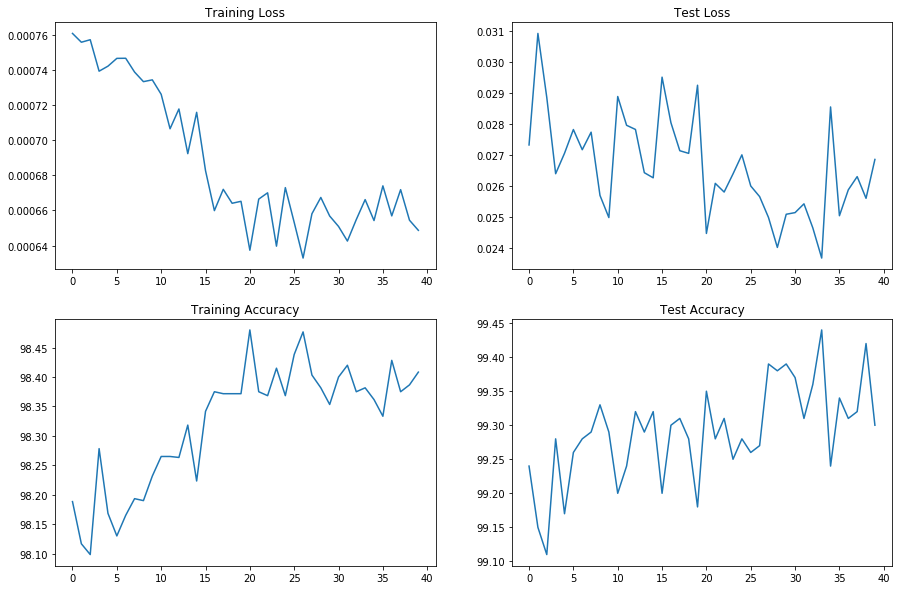

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(metrics_dataframe['Train Loss'])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(metrics_dataframe['Train Accuracy'])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(metrics_dataframe['Test Loss'])
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(metrics_dataframe['Test Accuracy'])
axs[1, 1].set_title("Test Accuracy")

In [0]:
metrics_dataframe.columns

Index(['gradients/gap_linear.1.weight', 'gradients/conv1.1.bias',
       'gradients/conv3.1.bias', 'parameters/conv2.1.weight',
       'parameters/conv3.0.weight', 'parameters/conv3.1.bias',
       'gradients/conv3.5.bias', 'gradients/conv2.1.bias',
       'gradients/conv1.5.bias', 'gradients/conv2.0.weight',
       'gradients/conv2.1.weight', 'parameters/conv1.1.weight',
       'parameters/conv1.5.bias', 'gradients/conv3.1.weight',
       'parameters/conv3.4.weight', 'parameters/conv2.1.bias',
       'gradients/conv2.5.weight', 'parameters/conv1.5.weight',
       'parameters/conv1.0.weight', 'gradients/conv1.4.weight',
       'parameters/conv1.4.weight', 'parameters/gap_linear.1.weight',
       'parameters/conv2.0.weight', 'parameters/conv1.1.bias',
       'gradients/conv1.5.weight', 'parameters/conv3.1.weight',
       'parameters/conv2.4.weight', 'gradients/conv1.1.weight',
       'gradients/conv2.5.bias', 'parameters/conv3.5.weight',
       'gradients/conv3.0.weight', 'parameters/co

In [0]:
metrics_dataframe['Learning Rate2']=[    metrics_dataframe['Learning Rate'][counter][0] for counter in range(len(metrics_dataframe['Learning Rate'])) ]

In [0]:
metrics_dataframe['Learning Rate2']

0     0.04000
1     0.04000
2     0.04000
3     0.04000
4     0.04000
5     0.04000
6     0.04000
7     0.01000
8     0.02000
9     0.00500
10    0.01000
11    0.00250
12    0.00500
13    0.00125
14    0.00250
Name: Learning Rate2, dtype: float64

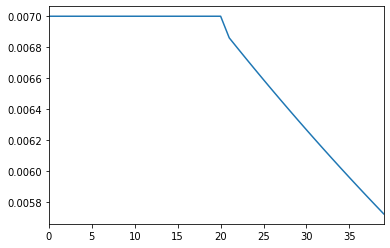

In [0]:
metrics_dataframe['Learning Rate2'].plot()
#, 'Test Accuracy']].plot()

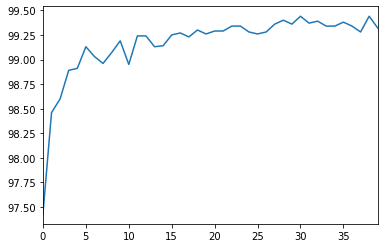

In [0]:
metrics_dataframe['Test Accuracy'].plot()

In [0]:
model.conv1.parameters()

<generator object Module.parameters at 0x7fa3c8ad08e0>

In [0]:
torch.save(model.state_dict(), "/content/drive/My Drive/EVA4/model_7288.h5")
